<a href="https://colab.research.google.com/github/husthorng/hello-world/blob/horng_1/backpropagation_4x3y_NQ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd



def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))





epstep=500

#numTag = int(input('Insert the number Neurons into Output Layer: '))
#epochs = int(input('Insert the number of Epochs: '))
#hidden_node = int(input('Insert the number Neurons into Hidden Layer: '))
#lr = float(input('Insert Learning Rate: '))
#limer = float(input('Insert Expected Error: '))
numTag=3
pernum=100
epochs=10000
hidden_node=6
lr=0.01
limer=0.05


#ur2 = "https://raw.githubusercontent.com/husthorng/hello-world/horng_1/N_Q.csv"

ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y_NQ.csv"

In [ ]:
limer=0.02

In [2]:
records = pd.read_csv(ur2,encoding='utf-8')
Xi1=records.iloc[0:records.shape[0]].values

max_min_Xi=np.array([list(np.max(Xi1,axis=0)),list(np.min(Xi1,axis=0))])
ptp_Xi=np.ptp(max_min_Xi,axis=0)
NXi=(Xi1 - np.min(Xi1,axis=0))/ptp_Xi
#NXi*ptp_Xi+max_min_Xi[1]

In [4]:
NXi[0]

array([0.3       , 0.2       , 0.796875  , 0.1       , 0.83764724,
       0.82330265, 0.84185418])

In [5]:
Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values
#targetD[0] #[ 47.39592, 943.3549 ]

In [6]:
W1=np.random.rand(hidden_node,inputD.shape[1]+1)*0.5
W2=np.random.rand(targetD.shape[1],hidden_node+1)*0.5
onex=np.ones(inputD.shape[0],dtype=int)


In [7]:
max_min_l=np.array([list(np.max(inputD,axis=0)),list(np.min(inputD,axis=0))])
#max_min_l=np.array([max_min_l[0]*1.1,max_min_l[1]*0.9])
#max_min_l

In [8]:
np.insert(inputD,0,max_min_l,axis=0)
inputD1=np.insert(inputD,0,max_min_l,axis=0)
ptp_inputD1=np.ptp(inputD1,axis=0)

In [9]:
inputD2=(inputD1 - np.min(inputD1,axis=0))/ptp_inputD1
#inputD2
inputD3=inputD2[2:,:]
#inputD3
inputD3_1=np.insert(inputD3, 0, 1, axis=1)
#inputD3_1


In [10]:
max_min_T=np.array([list(np.max(targetD,axis=0)),list(np.min(targetD,axis=0))])
max_min_T=np.array([max_min_T[0]*1.1,max_min_T[1]*0.9])
#print(max_min_T)
targetD1=np.insert(targetD,0,max_min_T,axis=0)

ptp_targetD1=np.ptp(targetD1,axis=0)
targetD2=(targetD1 - np.min(targetD1,axis=0))/ptp_targetD1
targetD3=targetD2[2:,:]

In [ ]:
targetD3

In [ ]:
ersum=100
ix=1
SSE_Goal=10
while ersum > limer:
  net_h=inputD3_1@W1.T
  out_h=sigmoid(net_h,deriv=False)
  out_H1=np.insert(out_h, 0, 1, axis=1)
  net_o=out_H1@W2.T
  out_o=sigmoid(net_o,deriv=False)
  er=targetD3-out_o
  ersum=np.sum(er**2)
  if ix%pernum==0:
    print("run:",ix,"sumer=",ersum)
  ix+=1
  delta_o=out_o*(1-out_o)*er #delta_o= (300, 2)
  ckdao=delta_o.T@out_H1
  delta_W2=lr*delta_o.T@out_H1
  W2 = W2+delta_W2
  data2=out_h*(1-out_h)
  data1=(delta_o@W2[:,1:])*data2
  delw1=lr*((inputD3_1.T@data1).T)
  W1=W1+delw1

out_o_V=out_o*ptp_targetD1+max_min_T[1]
df = pd.DataFrame(out_o_V)
df.to_csv("out_o_V.csv")

if ersum < SSE_Goal :
    print("SSE_Goal > ersum")
#    break
else:
    print("ersum > SSE_Goal")

In [ ]:
np.insert(inputD3, 0, 1, axis=1)

array([[1.      , 0.3     , 0.2     , 0.796875, 0.1     ],
       [1.      , 0.9     , 0.3     , 1.      , 0.      ],
       [1.      , 0.5     , 0.8     , 0.59375 , 0.5     ],
       ...,
       [1.      , 0.1     , 0.4     , 0.59375 , 0.1     ],
       [1.      , 0.2     , 0.5     , 0.796875, 0.6     ],
       [1.      , 0.4     , 0.6     , 0.09375 , 0.3     ]])

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(X, y,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data, test_data, train_labels, test_labels = res

In [ ]:
train_data=X
train_labels=y

In [ ]:
train_labels[0]

array([0.83764724, 0.82330265])

In [ ]:
np.random.seed()
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((train_data[0].size,nHiddenLayer)) - 1
syn1 = 2*np.random.random((nHiddenLayer+1,train_labels.shape[1])) - 1

In [ ]:
print(syn0)

[[ 0.70278286 -0.03085458  0.27626508  0.25623354 -0.60017807  0.64418505]
 [ 0.75164748 -0.50280438 -0.33724531 -0.77279847 -0.47324204 -0.19392875]
 [ 0.82709253  0.60076902 -0.37456068  0.36961757  0.13696653  0.59306847]
 [ 0.19785518  0.91494344  0.55699346 -0.85541137 -0.13070417  0.30651872]
 [ 0.5694266  -0.08670545 -0.21899264 -0.4053464   0.04219167  0.64103187]]


In [ ]:
syn1

array([[-0.52973353,  0.22575606],
       [ 0.80682063,  0.14428518],
       [ 0.41687287, -0.94651535],
       [ 0.25069804, -0.15550501],
       [ 0.18500742, -0.10487095],
       [ 0.69159803, -0.87304643],
       [ 0.29538281, -0.11414894]])

In [ ]:

for j in range(epochs):

	# Feed forward through layers 0, 1, and 2
    l0 = train_data
    l1 = sigmoid(np.dot(l0,syn0))
    l1=np.insert(l1,l1[0].size,1,axis=1)
    l2 = sigmoid(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = train_labels - l2
    if(np.mean(np.abs(l2_error))<expectedError):
      break
    if (j% epstep) == 0:
      losses.append(np.mean(np.abs(l2_error)))
      R_losses.append(j)
      print(str(j)+" Error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*sigmoid(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta =learningRate*l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)[:,:-1]


0 Error:0.21725983995663048
500 Error:0.4923505833894192
1000 Error:0.49235058188141884
1500 Error:0.49235058031543627
2000 Error:0.4923505786880482
2500 Error:0.4923505769955566
3000 Error:0.49235057523396014
3500 Error:0.49235057339892213
4000 Error:0.49235057148573513
4500 Error:0.4923505694892801
5000 Error:0.4923505674039807
5500 Error:0.49235056522375087
6000 Error:0.49235056294193497
6500 Error:0.49235056055124005
7000 Error:0.49235055804365696
7500 Error:0.492350555410371
8000 Error:0.49235055264165745
8500 Error:0.49235054972676107
9000 Error:0.4923505466537557
9500 Error:0.4923505434093806


In [ ]:
l2

In [ ]:
syn1

output after Training:


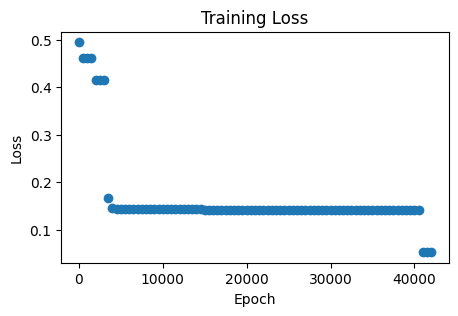

In [ ]:


#print output
print("output after Training:")
for i in range(l2.shape[0]):
  for j in range(l2.shape[1]):
    if l2[i][j] > 0.5:
      l2[i][j]=1
    else:
      l2[i][j]=0
#  print(l2[i])
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(R_losses, losses)
#plt.scatter(R_losses, losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



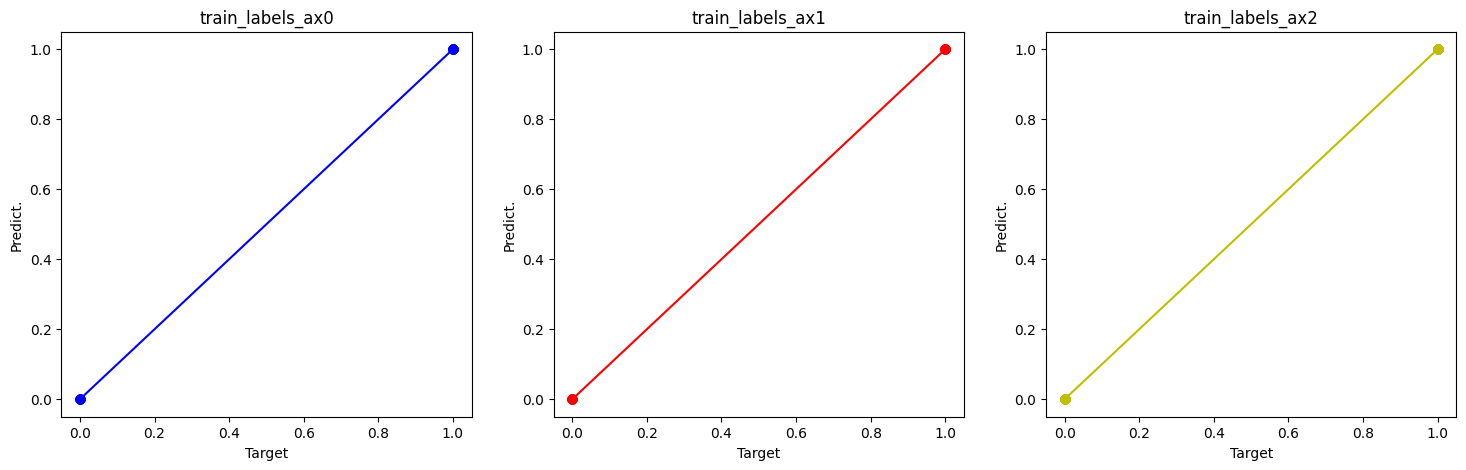

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

import pandas as pd
DF = pd.DataFrame(syn0)
DF.to_csv("syn0.csv")
DF = pd.DataFrame(syn1)
DF.to_csv("syn1.csv")
DF = pd.DataFrame(l2)
DF.to_csv("l2.csv")
DF = pd.DataFrame(train_labels)
DF.to_csv("train_labels.csv")
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([0, 1],color = "b")
ax0.scatter(train_labels[:,0], l2[:,0],color = "b")
ax0.set_title('train_labels_ax0')

ax1 = fig.add_subplot(spec[1])
ax1.plot([0, 1],color = "r")
ax1.scatter(train_labels[:,1], l2[:,1],color = "r")
ax1.set_title('train_labels_ax1')

ax2 = fig.add_subplot(spec[2])
ax2.plot([0, 1],color = "y")
ax2.scatter(train_labels[:,2], l2[:,2],color = "y")
ax2.set_title('train_labels_ax2')

#plt.title('')

ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()


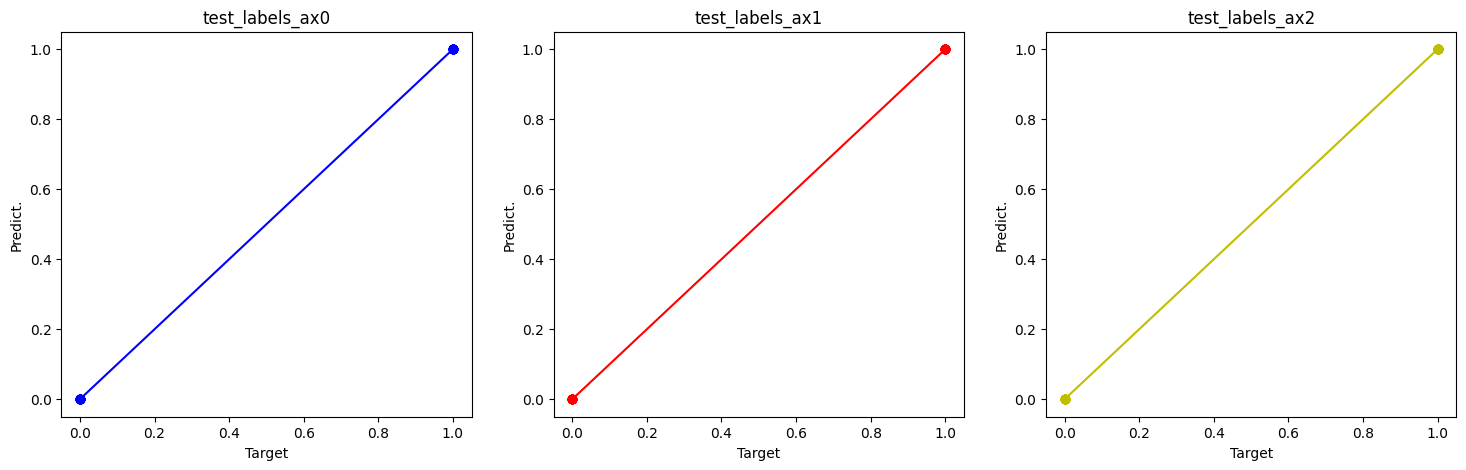

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np




l0 = test_data
l1 = sigmoid(np.dot(l0,syn0))
l1=np.insert(l1,l1[0].size,1,axis=1)
l2 = sigmoid(np.dot(l1,syn1))
for i in range(l2.shape[0]):
  for j in range(l2.shape[1]):
    if l2[i][j] > 0.5:
      l2[i][j]=1
    else:
      l2[i][j]=0
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([0, 1],color = "b")
ax0.scatter(test_labels[:,0], l2[:,0],color = "b")
ax0.set_title('test_labels_ax0')

ax1 = fig.add_subplot(spec[1])
ax1.plot([0, 1],color = "r")
ax1.scatter(test_labels[:,1], l2[:,1],color = "r")
ax1.set_title('test_labels_ax1')

ax2 = fig.add_subplot(spec[2])
ax2.plot([0, 1],color = "y")
ax2.scatter(test_labels[:,2], l2[:,2],color = "y")
ax2.set_title('test_labels_ax2')

#plt.title('')

ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()


In [ ]:
import numpy as np
import csv
import pandas as pd
urlsyn0 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/4X3ysyn0.csv"
urlsyn1 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/4X3ysyn1.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
syn0=syn0t[1:,1:]
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
syn1=syn1t[1:,1:]
nOutputs=syn1.shape[1]

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))



In [ ]:
import numpy as np
import csv
import pandas as pd
url = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y.csv"
records = pd.read_csv(url,encoding='utf-8',header=None)
Xi=records.iloc[0:records.shape[0],0:records.shape[1]-nOutputs].values
y=records.iloc[:,list(records.shape[1]-np.arange(nOutputs,0,-1))].values
X=np.insert(Xi,Xi[0].size,1,axis=1)
from sklearn.model_selection import train_test_split
res = train_test_split(X, y,
            train_size=0.8,
            test_size=0.2,
            random_state=42)
train_data, test_data, train_labels, test_labels = res


In [ ]:
l0 = test_data
l1 = sigmoid(np.dot(l0,syn0))
l1=np.insert(l1,l1[0].size,1,axis=1)
l2 = sigmoid(np.dot(l1,syn1))
for i in range(l2.shape[0]):
  for j in range(l2.shape[1]):
    if l2[i][j] > 0.5:
      l2[i][j]=1
    else:
      l2[i][j]=0

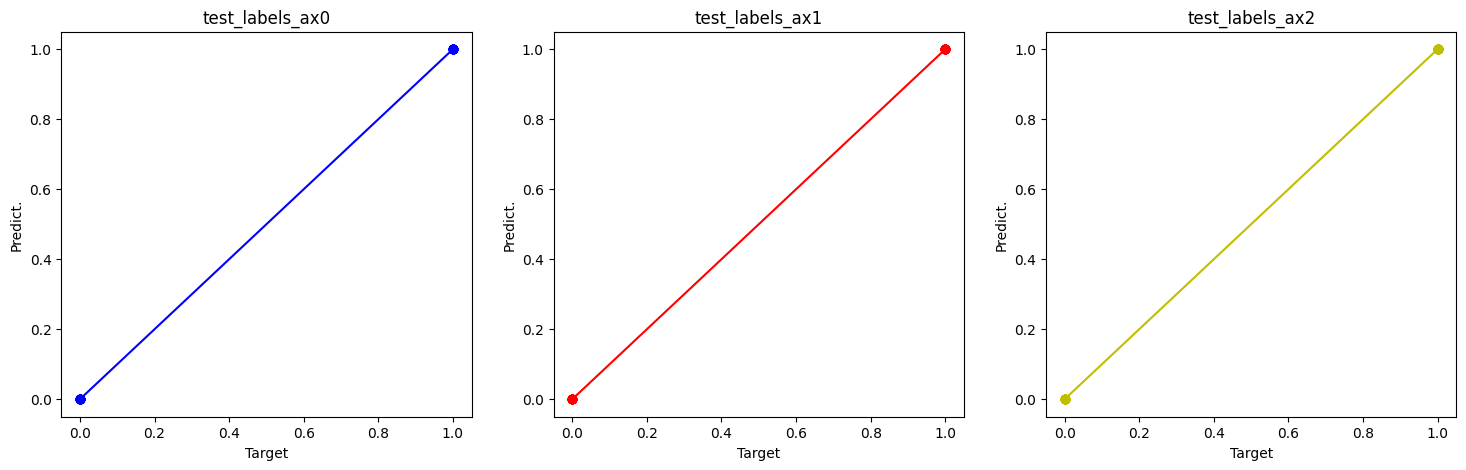

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import gridspec
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([0, 1],color = "b")
ax0.scatter(test_labels[:,0], l2[:,0],color = "b")
ax0.set_title('test_labels_ax0')

ax1 = fig.add_subplot(spec[1])
ax1.plot([0, 1],color = "r")
ax1.scatter(test_labels[:,1], l2[:,1],color = "r")
ax1.set_title('test_labels_ax1')

ax2 = fig.add_subplot(spec[2])
ax2.plot([0, 1],color = "y")
ax2.scatter(test_labels[:,2], l2[:,2],color = "y")
ax2.set_title('test_labels_ax2')


ax0.set_xlabel('Target')
ax0.set_ylabel('Predict.')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict.')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict.')
plt.show()